# Corporate Prosecution - Exercise Q

#### Summary

Investigate the differences between different states' prosecution of corporate issues.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Source

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [96]:
import pandas as pd 

df = pd.read_csv("cpr-data.csv") #skiprows=5 GIA NA PERASEIS TA PANW PANW EISAGWGIKA!)
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,"272,734",12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000",nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640",nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000",nan,0,"2,500",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN


### Check that your dataframe has 3038 rows and 56 columns.

In [97]:
df.shape

(3038, 56)

### List the columns and their data types

In [98]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- FINE
- TOTAL_PAYMENT
- USAO
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

In [99]:
#type of crimes, dipositions, if there were an agreement and what, if there were a fine and the payment, the state of attorney's office, new positions, monitor positions.

# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

In [100]:
pd.options.display.max_columns

60

## Set pandas to display 60 columns

In [101]:
pd.set_option("display.max_columns",60)

## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [102]:
pd.options.display.max_rows

100

In [103]:
pd.set_option("display.max_rows",100)

## Describe the REGULATORY_FINE column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [104]:
df.FINE.describe()

count           2,908
mean       13,536,174
std        85,486,442
min                 0
25%             1,000
50%            70,000
75%         1,000,000
max     2,800,000,000
Name: FINE, dtype: float64

### Oh that's ugly ugly ugly. Set pandas to format floats with ZERO decimal points. And tell it to use a `,` in the thousands position.

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [105]:
pd.set_option("display.float_format", "{:,.0f}".format)
df.FINE.describe()

count           2,908
mean       13,536,174
std        85,486,442
min                 0
25%             1,000
50%            70,000
75%         1,000,000
max     2,800,000,000
Name: FINE, dtype: float64

## Look at the total payments for the first two rows. Pretty nice!

In [106]:
df['TOTAL_PAYMENT'].head(2)

0    272734
1     24000
Name: TOTAL_PAYMENT, dtype: int64

# A little summarizing

## What were the most popular crimes?

In [107]:
df['PRIMARY_CRIME_CODE'].value_counts()

Environmental                               541
Fraud - General                             484
Antitrust                                   253
Other                                       219
Import / Export                             158
False Statements                            139
Immigration                                 138
FCPA                                        135
Fraud - Tax                                 125
FDCA / Pharma                               113
Act to Prevent Pollution from Ships         103
Wildlife                                     97
Food                                         88
Fraud - Health Care                          84
Money Laundering                             72
Controlled substances / Drugs / Meth Act     55
Bank Secrecy Act                             54
OSHA / Workplace Safety / Mine Safety        31
Fraud - Securities                           31
Kickbacks                                    30
Gambling                                

### Graph the previous answer, with the longest bar on top

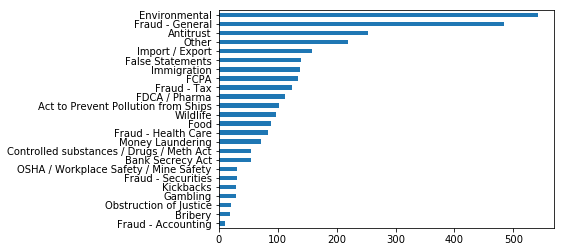

In [108]:
%matplotlib inline
df['PRIMARY_CRIME_CODE'].value_counts().sort_values().plot(kind='barh')

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, primary crime code, US Attorney's Office and total payment.

In [109]:
new_df = df[['COMPANY', 'DISPOSITION_TYPE', 'PRIMARY_CRIME_CODE', 'USAO', 'TOTAL_PAYMENT']]
new_df

,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,USAO,TOTAL_PAYMENT
0,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,Virginia - Eastern District,272734
1,"3D Poultry Loading, Inc.",plea,Immigration,Arkansas - Western District,24000
2,"3rd & Bell, LLC",plea,Immigration,Arizona,50
3,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,Georgia - Northern District,14640
4,"45,000, Inc.",plea,Environmental,Louisiana - Middle District,27500
5,4628 Group Inc.,plea,Environmental,New York - Northern District,500000
6,"70 North, LLC",plea,Environmental,Alaska,2000
7,806 Trading Corp.,plea,Other,New Jersey,42000
8,"83rd & Union Hills, LLC",plea,Immigration,Arizona,50
9,"84th & Bell, LLC",plea,Immigration,Arizona,50


## Confirm it has 3038 rows and 5 columns

In [110]:
new_df.shape

(3038, 5)

## Using this subset, try to extract the state name of the US Attorney's Office into a separate column called `state`

Your machine will complain. **Let's talk about that error.**

In [111]:
new_df['state'] = new_df.USAO.str.extract("(.*) - .*")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [112]:
new_df.head(26)

,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,USAO,TOTAL_PAYMENT,state
0,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,Virginia - Eastern District,272734,Virginia
1,"3D Poultry Loading, Inc.",plea,Immigration,Arkansas - Western District,24000,Arkansas
2,"3rd & Bell, LLC",plea,Immigration,Arizona,50,NaN
3,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,Georgia - Northern District,14640,Georgia
4,"45,000, Inc.",plea,Environmental,Louisiana - Middle District,27500,Louisiana
5,4628 Group Inc.,plea,Environmental,New York - Northern District,500000,New York
6,"70 North, LLC",plea,Environmental,Alaska,2000,NaN
7,806 Trading Corp.,plea,Other,New Jersey,42000,NaN
8,"83rd & Union Hills, LLC",plea,Immigration,Arizona,50,NaN
9,"84th & Bell, LLC",plea,Immigration,Arizona,50,NaN


## Look at the first 25 states.

Confirm they match the following. If they don't, improve your technique from above.

    0        Virginia
    1        Arkansas
    2         Arizona
    3         Georgia
    4       Louisiana
    5        New York
    6          Alaska
    7      New Jersey
    8         Arizona
    9         Arizona
    10       Virginia
    11       Virginia
    12      Louisiana
    13       New York
    14         Kansas
    15    Mississippi
    16         Oregon
    17        Florida
    18     California
    19      Louisiana
    20        Vermont
    21       New York
    22       New York
    23          USDOJ
    24          USDO

In [113]:
new_df.state.head(25)

0                      Virginia
1                      Arkansas
2                           NaN
3                       Georgia
4                     Louisiana
5                      New York
6                           NaN
7                           NaN
8                           NaN
9                           NaN
10                     Virginia
11                     Virginia
12                    Louisiana
13                     New York
14                          NaN
15                  Mississippi
16                          NaN
17                      Florida
18                   California
19                    Louisiana
20                          NaN
21                     New York
22                     New York
23    USDOJ - Criminal Division
24    USDOJ - Criminal Division
Name: state, dtype: object

## Hmm, maybe you should clean that up a little more and try again.

In [114]:
new_df['state'] = new_df.USAO.str.extract("([^.*,]\w+ ?\w+)")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [115]:
new_df.state.head(25)

0        Virginia
1        Arkansas
2         Arizona
3         Georgia
4       Louisiana
5        New York
6          Alaska
7      New Jersey
8         Arizona
9         Arizona
10       Virginia
11       Virginia
12      Louisiana
13       New York
14         Kansas
15    Mississippi
16         Oregon
17        Florida
18     California
19      Louisiana
20        Vermont
21       New York
22       New York
23          USDOJ
24          USDOJ
Name: state, dtype: object

## Which state has had the most total cases?

In [116]:
new_df.state.value_counts().head()

USDOJ         580
Florida       220
California    215
New York      179
Texas         124
Name: state, dtype: int64

## Which state has had the most total fines?

In [117]:
new_df.groupby('state')['TOTAL_PAYMENT'].sum().sort_values(ascending = False)

state
USDOJ             23765228750
New York          15699780905
Louisiana          4531757633
Massachusetts      4476920454
Michigan           3941190981
Virginia           2254367316
Florida            1809225843
Pennsylvania       1751471389
District of        1581435794
Connecticut        1511960683
California         1153522038
New Jersey          902173331
Texas               692004039
Illinois            608519488
Ohio                587424909
Rhode Island        543548834
Georgia             484094806
Minnesota           378928336
Wisconsin           304374202
Oklahoma            255233460
North Carolina      217725035
MIchigan            200000000
Maryland            153173049
Missouri            125585685
Alabama             114555399
North Dakota        101376831
Mississippi          74176031
Delaware             70622580
Washington           68162131
Alaska               60718216
Kentucky             39064587
Nevada               30680705
South Carolina       29025983
Puer

## Show me both the count AND the sum in the same dataframe

- Tip: There's a quick way to do this if you'd like

In [118]:
new_df.groupby('state').agg({'TOTAL_PAYMENT': ['sum','count']})

TOTAL_PAYMENT      
                         sum count
state                             
Alabama            114555399    27
Alaska              60718216    19
Arizona             10455037    34
Arkansas             3071778    24
California        1153522038   215
Colorado             8618944    22
Connecticut       1511960683    58
Delaware            70622580    11
District of       1581435794    46
Florida           1809225843   220
Georgia            484094806    57
Guam                 3050969     2
Hawaii               3007863    13
Idaho                7727312    18
Illinois           608519488    74
Indiana             19524134    26
Iowa                 3736949    15
Kansas               4370473    15
Kentucky            39064587    39
Louisana                   0     1
Louisiana         4531757633   112
MIchigan           200000000     1
Maine                9682554    13
Maryland           153173049    34
Massachusetts     4476920454    69
Michigan          3941190981    45
Minnesota          378928336    26
Mississippi         74176031    25
Missouri           125585685    96
Montana             19093684    11
Nebraska             2309088    18
Nevada              30680705     8
New Hampshire        8138501     8
New Jersey         902173331    81
New Mexico           1372395    10
New York         15699780905   179
North Carolina     217725035    68
North Dakota       101376831    10
Ohio               587424909   109
Oklahoma           255233460    11
Oregon              15595225    22
Pennsylvania      1751471389   105
Puerto Rico         27530000    14
Rhode Island       543548834    12
South Carolina      29025983    30
South Dakota         1210200     5
Tennessee            6152089    34
Texas              692004039   124
USAO                  290802     4
USDOJ            23765228750   580
Utah                 3641485     6
Vermont              2232945     6
Virgin Islands       3300000     2
Virginia          2254367316    93
Washington          68162131    38
West Virginia       15892166    22
Wisconsin          304374202    28
Wyoming              1129784    10
illinois              696163     2
other gov           17800500     6

## Graph that, but only for "real" states

Here's a list of state names, if you'd like:

    ['Alaska', 'Alabama', 'Arkansas', 'American Samoa', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana', 'National', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']

In [119]:
states = ['Alaska', 'Alabama', 'Arkansas', 'American Samoa', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana', 'National', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']
lol = new_df[new_df['state'].isin(states)].groupby('state')['TOTAL_PAYMENT'].agg(['sum','count'])
#i = new_df[new_df['state'].isin(states)].groupby('state').agg({'TOTAL_PAYMENT': ['count','sum']})
#lol['TOTAL_PAYMENT']

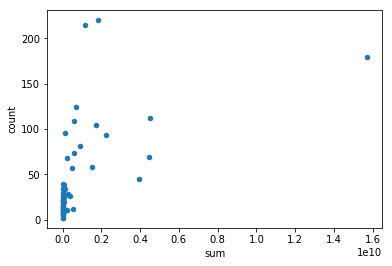

In [120]:
lol.plot(kind='scatter', x='sum', y= 'count')

#COLORS = ValueError: Colormap cmap is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

## What are the states that have so many prosecutions but so little money?

In [138]:

little_money = lol[(lol['count']> lol['count'].mean()) & (lol['sum']<lol['sum'].mean())]
little_money.sort_values(by= 'sum', ascending=False)

,sum,count
state,,
Texas,692004039,124
Illinois,608519488,74
Ohio,587424909,109
Georgia,484094806,57
North Carolina,217725035,68
Missouri,125585685,96


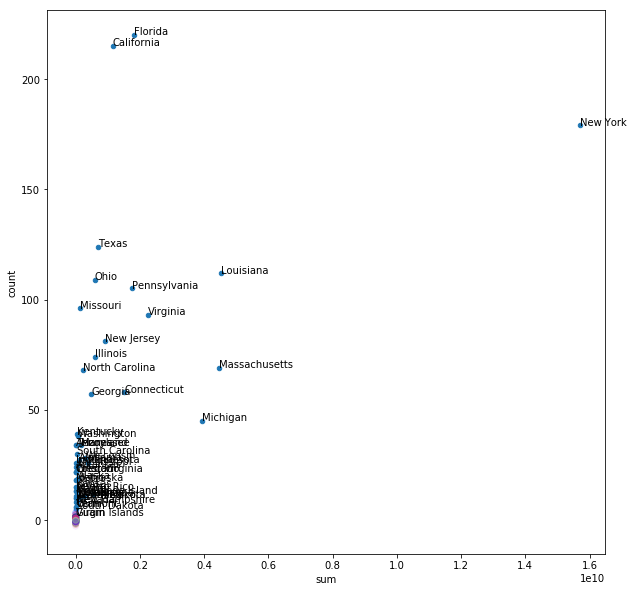

In [139]:
#The purpose was to present labels and find the outliners.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

fig, ax = plt.subplots()
lol.plot('sum', 'count', kind='scatter', figsize = (10,10), ax=ax)

for k, v in lol.iterrows():
    ax.annotate(k, v)
    
from matplotlib import cm

N = 100
x = np.random.normal(0, 1, N)
y = np.random.normal(0, 1, N)
c = np.random.random((N, 4))

plt.scatter(x, y, c=c)
plt.show()



for k, v in lol.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='Dark2')


# Make another comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."

In [140]:
df[['COMPANY','TOTAL_PAYMENT']][(df['DATE'] < '2003-6-1') & (df['TOTAL_PAYMENT'] > 2* df['TOTAL_PAYMENT'].mean())]

,COMPANY,TOTAL_PAYMENT
26,ABB Middle East & Africa Participations AG,53000000
264,Astrazeneca Pharm LP,63872156
406,Bilhar International Establishment,54000000
502,CG Nutritionals Inc.,400000000
517,"CSI AG, Ltd.",122527160
799,Daicel Chemical Industries Ltd.,53000000
1892,NMC Medical Products,49345698
2080,PNC ICLC Corp.,115000000
2331,Republic New York Securities Corp.,569000000
2471,Sears,62600000


In [141]:
df[['COMPANY','TOTAL_PAYMENT']][(df['DATE'] > '2003-6-1') & (df['TOTAL_PAYMENT'] > 2 * df['TOTAL_PAYMENT'].mean())]

,COMPANY,TOTAL_PAYMENT
33,ABN AMRO Bank N.V.,505000000
40,AEM Inc.,200000000
48,AIG Financial Products Corp.,80000000
50,AOL,210000000
55,AU Optronics Corp.,500000000
61,Abbott Laboratories,698500000
75,Adelphia Communications,715000000
94,"Aggregate Industries Northeast Region, Inc.",50000000
99,Air France / KLM,210000000
124,Alcatel-Lucent,92000000
